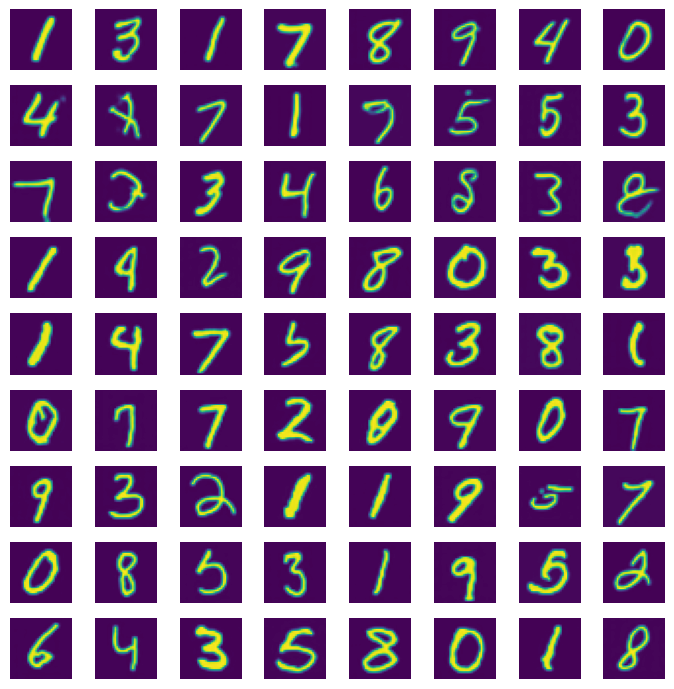

In [18]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()
config.ddpm.schedule_type = "linear_beta"

for k, n_steps in enumerate([10, 100, 1000]):
    config.sample.n_steps = n_steps
    x = np.load(config.samples_path)["x"]
    for i in range(24):
        plt.subplot(9, 8, k * 24 + i + 1)
        plt.imshow(x[i, 0])
        plt.axis("off")

plt.tight_layout()
plt.show()

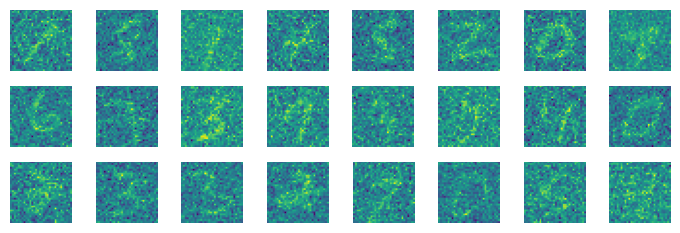

In [4]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()

x = np.load(config.samples_path)["states"][:, 1]
for i in range(24):
    plt.subplot(9, 8, k * 24 + i + 1)
    plt.imshow(x[i, 0])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [26]:
file = np.load("results/mnist_50000_iter_flattening_temp_unbiased_schedule_1000_steps_samples.npz")
temp = file["temp"]
x = file["states"][:, 0]

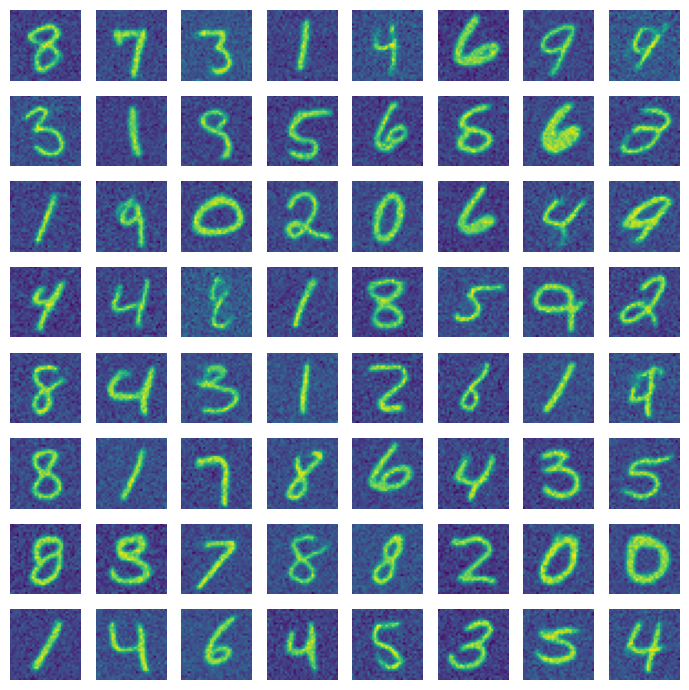

In [28]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()


x = np.load(config.samples_path)["states"][:, 0]
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(x[i, 0])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [21]:
(temp < 0.01).sum()

10

In [22]:
temp[10]

array([[[0.10039236]]], dtype=float32)

In [23]:
temp[9]

array([[[0.09150925]]], dtype=float32)

In [25]:
temp.reshape(-1)

array([9.6084028e-03, 1.8953649e-02, 2.8365226e-02, ..., 1.1026185e+03,
       1.5682919e+03, 2.7078770e+03], dtype=float32)

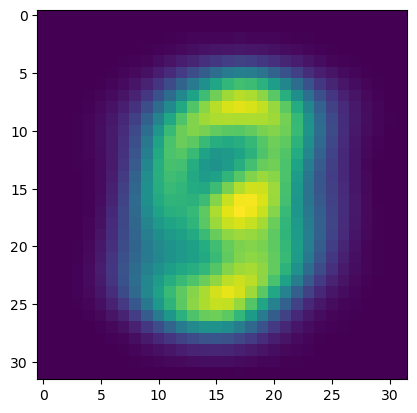

In [16]:
plt.imshow(get_data_tensor(config, train=False).mean(dim=(0, 1)))

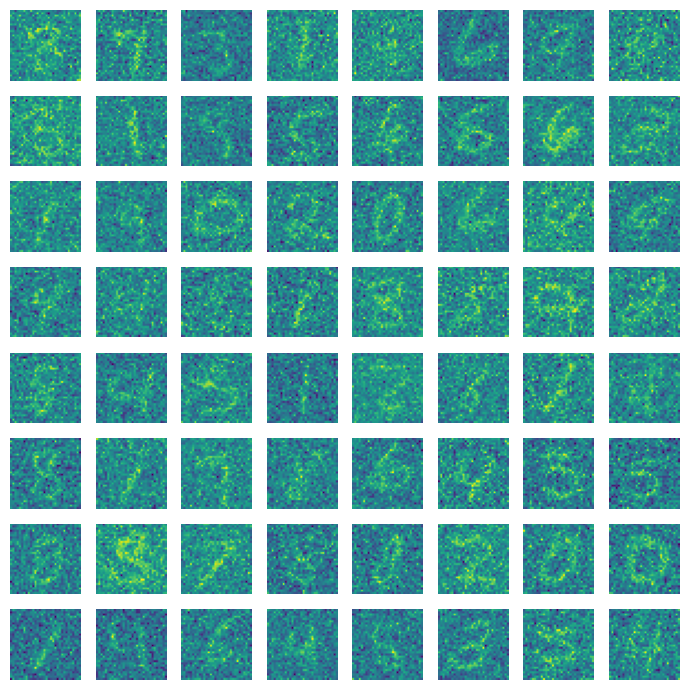

In [15]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()


x = np.load(config.samples_path)["states"][:, 1]
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(x[i, 0])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [31]:
from diffusion import get_ddpm


ddpm = get_ddpm(config)
ddpm.load_state_dict(torch.load("checkpoints/mnist_50000_iter_flattening_temp_unbiased_schedule.pth"))

<All keys matched successfully>

In [36]:
ddpm = ddpm.cuda()

In [ ]:
get_data_tensor(0)

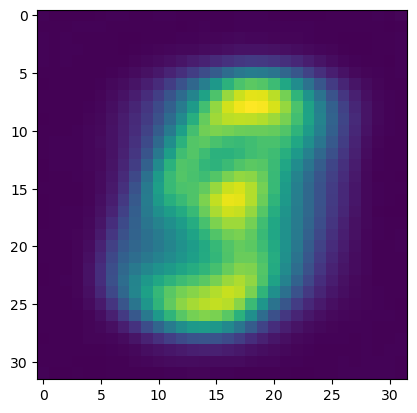

In [44]:
plt.imshow(ddpm(torch.randn(1, 1, 32, 32, device="cuda"), torch.full((1,), 1, device="cuda").long())[0, 0].detach().cpu())

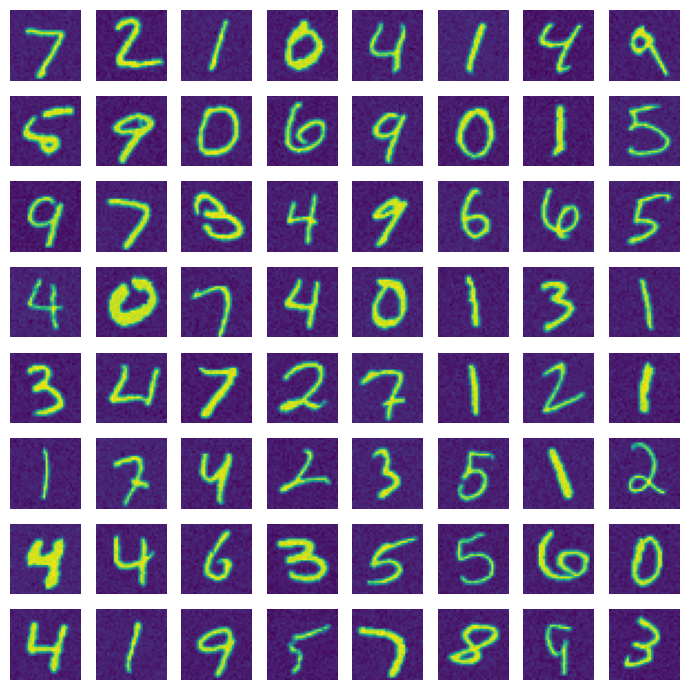

In [45]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from utils import get_data_tensor
import torch


plt.figure(figsize=(7, 7))
config = load_config()
data = get_data_tensor(config, train=False)
x = data + torch.randn_like(data) * 3e-2

for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(x[i, 0])
    plt.axis("off")

plt.tight_layout()
plt.show()

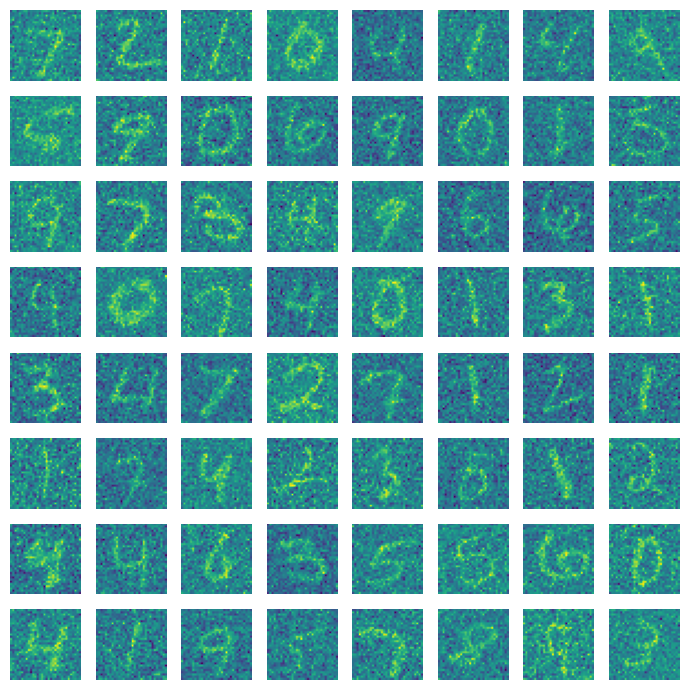

In [12]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from utils import get_data_tensor
import torch


plt.figure(figsize=(7, 7))
config = load_config()
data = get_data_tensor(config, train=False)
x = data + torch.randn_like(data) * 5e-1

for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(x[i, 0])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [7]:
from utils import get_time_evenly_spaced
from diffusion import get_ddpm
from diffusion.diffusion_utils import DynamicCoeffs


ddpm = get_ddpm(config)
t_grid = get_time_evenly_spaced(20, min_t = config.ddpm.min_t)
dynamic_coeffs = DynamicCoeffs(ddpm.dynamic.get_temp(t_grid))

In [11]:
for key, value in dynamic_coeffs.__dict__.items():
    if isinstance(value, torch.Tensor):
        print(key)
        print(value.squeeze())

temp
tensor([9.6084e-03, 4.6449e-01, 9.1936e-01, 1.3708e+00, 1.8237e+00, 2.2922e+00,
        2.7916e+00, 3.3369e+00, 3.9507e+00, 4.6615e+00, 5.5049e+00, 6.5342e+00,
        7.8363e+00, 9.5500e+00, 1.1932e+01, 1.5479e+01, 2.1355e+01, 3.2973e+01,
        6.7026e+01, 2.7079e+03])
alpha_bar
tensor([9.9048e-01, 6.8283e-01, 5.2101e-01, 4.2180e-01, 3.5415e-01, 3.0374e-01,
        2.6374e-01, 2.3058e-01, 2.0199e-01, 1.7663e-01, 1.5373e-01, 1.3273e-01,
        1.1317e-01, 9.4787e-02, 7.7329e-02, 6.0683e-02, 4.4734e-02, 2.9435e-02,
        1.4700e-02, 3.6916e-04])
beta
tensor([0.0095, 0.3106, 0.2370, 0.1904, 0.1604, 0.1423, 0.1317, 0.1257, 0.1240,
        0.1256, 0.1296, 0.1366, 0.1474, 0.1624, 0.1842, 0.2153, 0.2628, 0.3420,
        0.5006, 0.9749])
posterior_x0_coef
tensor([1.0000, 0.9746, 0.4088, 0.2377, 0.1613, 0.1216, 0.0986, 0.0839, 0.0746,
        0.0685, 0.0644, 0.0618, 0.0605, 0.0604, 0.0615, 0.0637, 0.0678, 0.0745,
        0.0872, 0.1182])
posterior_xt_coef
tensor([0.0000, 0.0249, 0.57

In [5]:
from diffusion.diffusion_utils import get_temp_schedule
import torch
from config import load_config


config = load_config()


get_temp_schedule(config)(torch.linspace(1e-3, 1, 20))

tensor([9.6084e-03, 4.6494e-01, 9.2027e-01, 1.3721e+00, 1.8255e+00, 2.2947e+00,
        2.7947e+00, 3.3409e+00, 3.9559e+00, 4.6685e+00, 5.5141e+00, 6.5469e+00,
        7.8540e+00, 9.5760e+00, 1.1972e+01, 1.5546e+01, 2.1481e+01, 3.3269e+01,
        6.8260e+01, 9.9082e+03])

In [2]:
config = load_config()
config.ddpm.schedule_type = "cosine"
config.ddpm.min_t

1e-05

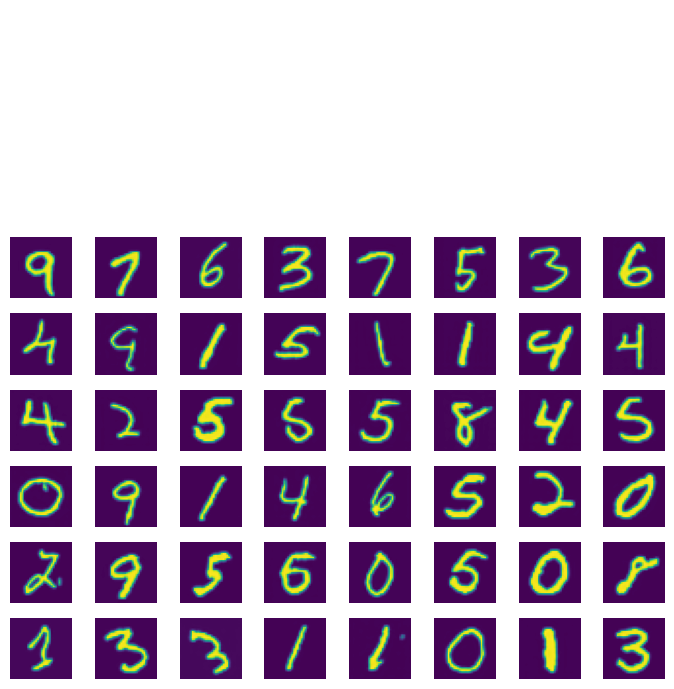

In [1]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()
config.ddpm.schedule_type = "cosine"

for k, n_steps in enumerate([10, 100, 1000]):
    config.sample.n_steps = n_steps
    x = np.load(config.samples_path)["x"]
    for i in range(24):
        plt.subplot(9, 8, k * 24 + i + 1)
        plt.imshow(x[i, 0])
        plt.axis("off")

plt.tight_layout()
plt.show()

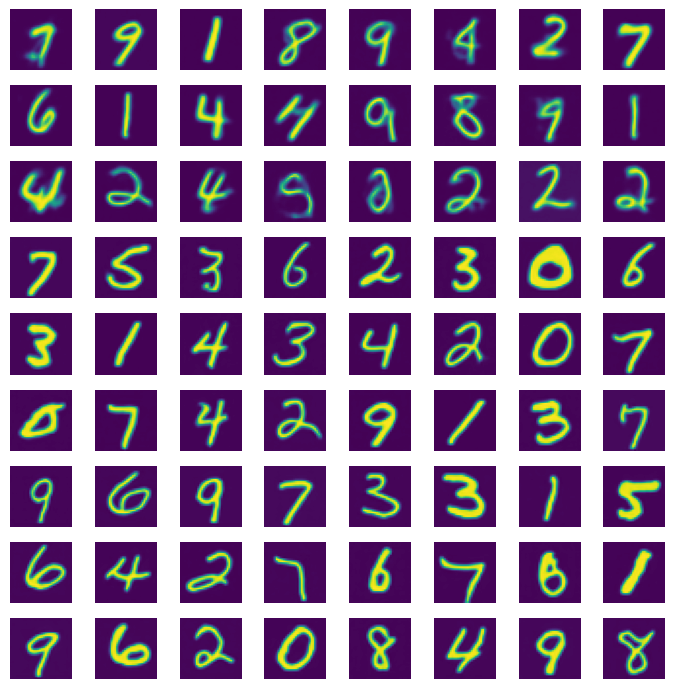

In [4]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


plt.figure(figsize=(7, 7))
config = load_config()
config.ddpm.schedule_type = "flattening_temp_unbiased"

for k, n_steps in enumerate([10, 100, 1000]):
    config.sample.n_steps = n_steps
    x = np.load(config.samples_path)["x"]
    for i in range(24):
        plt.subplot(9, 8, k * 24 + i + 1)
        plt.imshow(x[i, 0])
        plt.axis("off")

plt.tight_layout()
plt.show()

In [9]:
from utils import get_time_evenly_spaced
from diffusion.diffusion_utils import get_cosine_temp_schedule, DynamicCoeffs


temp = get_cosine_temp_schedule()(get_time_evenly_spaced(1000))
dc = DynamicCoeffs(temp)

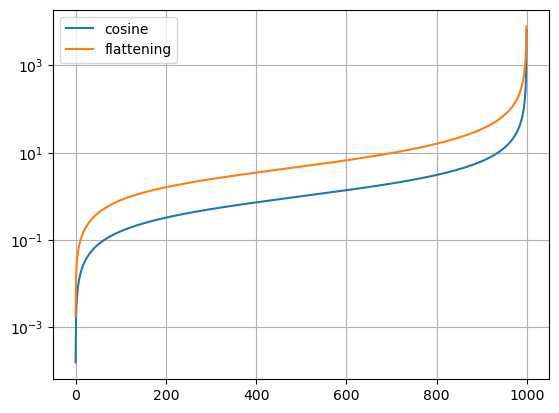

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from config import load_config
from diffusion.diffusion_utils import DynamicCoeffs, get_temp_schedule
from torch import from_numpy
import torch


t = torch.linspace(1e-4, 1 - 1e-4, 1000)
temp_schedule = get_temp_schedule(load_config())

plt.plot(np.tan(0.5 * t * np.pi), label="cosine")
plt.plot(temp_schedule(t), label="flattening")


plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

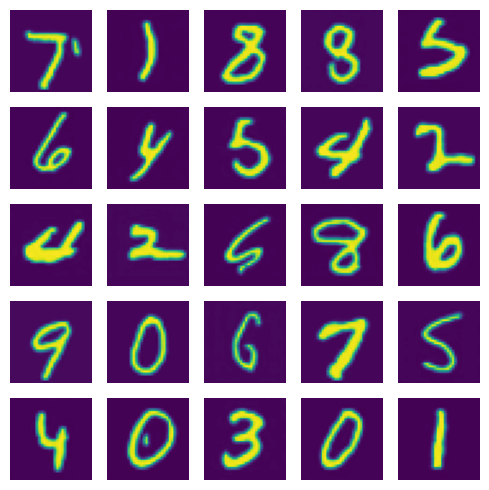

In [1]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


config = load_config()
x = np.load(config.samples_path)["x"]
plt.figure(figsize=(5, 5))
for i, j in product(range(5), range(5)):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x[i * 5 + j].reshape(32, 32))
    plt.axis("off")

plt.tight_layout()
plt.show()

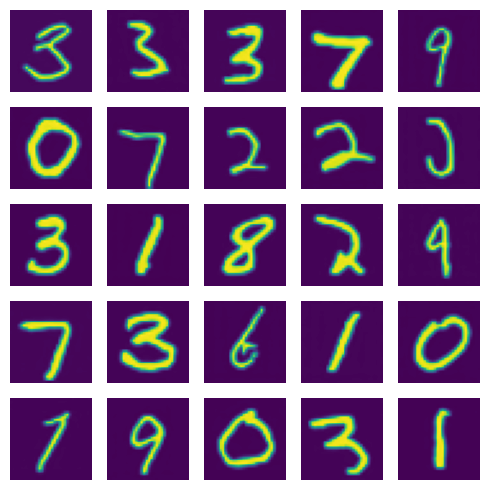

In [1]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


config = load_config()
x = np.load(config.samples_path)["x"]
plt.figure(figsize=(5, 5))
for i, j in product(range(5), range(5)):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x[i * 5 + j].reshape(32, 32))
    plt.axis("off")

plt.tight_layout()
plt.show()

/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


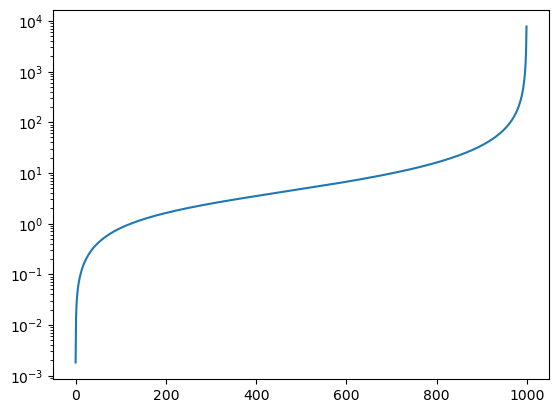

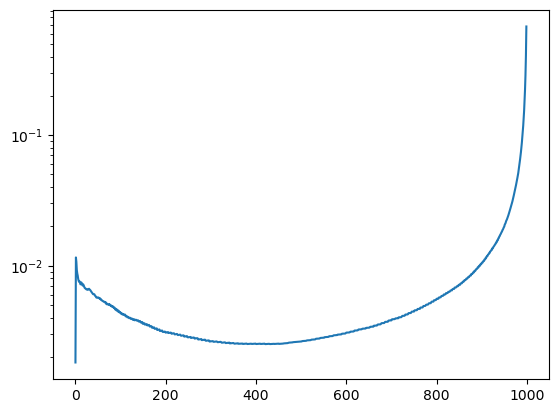

In [2]:
from diffusion.diffusion_utils import DynamicCoeffs
from torch import from_numpy


dynamic_coeffs = DynamicCoeffs(from_numpy(np.load(config.samples_path)["temp"]).squeeze())

plt.figure()
plt.plot(dynamic_coeffs.temp)
plt.yscale("log")

plt.figure()
plt.plot(dynamic_coeffs.beta)
plt.yscale("log")

plt.show()

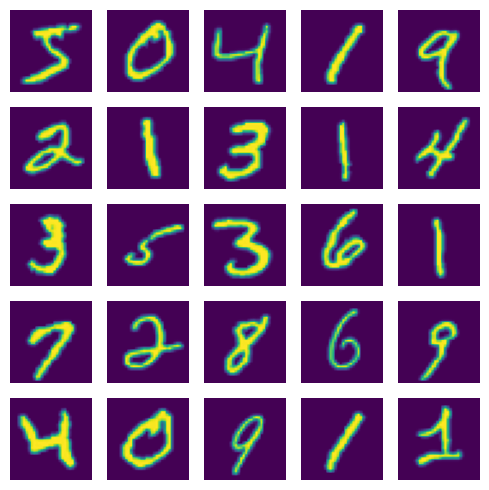

In [4]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from utils import get_data_tensor


config = load_config()
x = get_data_tensor(config)
plt.figure(figsize=(5, 5))
for i, j in product(range(5), range(5)):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x[i * 5 + j].reshape(32, 32))
    plt.axis("off")

plt.tight_layout()
plt.show()

In [10]:
from pytorch_fid import fid_score

In [15]:
[*filter(lambda x: "model" in x, fid_score.__dict__)]

[]

In [16]:
fid_score.__dict__

{'__name__': 'pytorch_fid.fid_score',
 '__doc__': 'Calculates the Frechet Inception Distance (FID) to evalulate GANs\n\nThe FID metric calculates the distance between two distributions of images.\nTypically, we have summary statistics (mean & covariance matrix) of one\nof these distributions, while the 2nd distribution is given by a GAN.\n\nWhen run as a stand-alone program, it compares the distribution of\nimages that are stored as PNG/JPEG at a specified location with a\ndistribution given by summary statistics (in pickle format).\n\nThe FID is calculated by assuming that X_1 and X_2 are the activations of\nthe pool_3 layer of the inception net for generated samples and real world\nsamples respectively.\n\nSee --help to see further details.\n\nCode apapted from https://github.com/bioinf-jku/TTUR to use PyTorch instead\nof Tensorflow\n\nCopyright 2018 Institute of Bioinformatics, JKU Linz\n\nLicensed under the Apache License, Version 2.0 (the "License");\nyou may not use this file exc